In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [407]:
#Load Train data sets
train_data = pd.read_csv("train.csv.zip")
#Load Test data sets
test_data = pd.read_csv("test.csv.zip")

In [365]:
train_data['Open Date'] = pd.to_datetime(train_data['Open Date'],format='%m/%d/%Y')

In [366]:
train_data.head(5)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


# Adding the total days to the data till the data is trained

In [367]:
from datetime import date
today = pd.DataFrame({'Date': np.repeat(['03/30/2022'],[len(train_data)])})
today['Date']=pd.to_datetime(today['Date'],format='%m/%d/%Y')
train_data['Open Days'] = today['Date']-train_data['Open Date']
train_data['Open Days'] = train_data['Open Days'].astype('timedelta64[D]').astype(int)

In [368]:
train_data.head(5)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Open Days
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,5,3,4,5,5,4,3,4,5653753.0,8292
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,0,6923131.0,5158
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,0,2055379.0,3308
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,25,12,10,6,18,12,12,6,2675511.0,3709
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,5,1,3,2,3,4,3,3,4316715.0,4708


In [369]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Id          137 non-null    int64         
 1   Open Date   137 non-null    datetime64[ns]
 2   City        137 non-null    object        
 3   City Group  137 non-null    object        
 4   Type        137 non-null    object        
 5   P1          137 non-null    int64         
 6   P2          137 non-null    float64       
 7   P3          137 non-null    float64       
 8   P4          137 non-null    float64       
 9   P5          137 non-null    int64         
 10  P6          137 non-null    int64         
 11  P7          137 non-null    int64         
 12  P8          137 non-null    int64         
 13  P9          137 non-null    int64         
 14  P10         137 non-null    int64         
 15  P11         137 non-null    int64         
 16  P12         137 non-null  

In [370]:
train_data.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Open Days
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02,137.000000
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06,4756.262774
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06,1471.257507
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06,2986.000000
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06,3752.000000
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06,4418.000000
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06,5233.000000
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07,9457.000000


In [371]:
test_data.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,4.088030,4.428085,4.215325,4.396025,1.989590,2.881900,5.30051,4.93100,5.251380,...,3.233785,3.084000,2.083300,1.193330,1.942640,0.987430,2.108670,1.832830,1.968890,0.973500
std,28867.657797,2.812963,1.428865,0.842161,1.035827,1.065314,1.531429,2.17858,1.71849,1.702632,...,2.136694,1.783927,4.309479,2.307944,3.971298,1.534808,4.685414,3.228769,3.805773,1.677267
min,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.00000,1.00000,4.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24999.750000,2.000000,3.750000,4.000000,4.000000,1.000000,2.000000,5.00000,4.00000,4.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49999.500000,3.000000,5.000000,4.000000,4.000000,2.000000,2.000000,5.00000,5.00000,5.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74999.250000,4.000000,5.000000,4.000000,5.000000,2.000000,4.000000,5.00000,5.00000,5.000000,...,4.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000
max,99999.000000,15.000000,7.500000,6.000000,7.500000,6.000000,10.000000,10.00000,10.00000,10.000000,...,12.500000,10.000000,25.000000,15.000000,25.000000,6.000000,30.000000,15.000000,20.000000,8.000000


In [372]:
#check for null values
train_data.isna().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
Open Days     0
dtype: int64

In [373]:
#Check all the cities and the total number of cities 
train_data.City.unique(), len(train_data.City.unique())

(array(['İstanbul', 'Ankara', 'Diyarbakır', 'Tokat', 'Gaziantep',
        'Afyonkarahisar', 'Edirne', 'Kocaeli', 'Bursa', 'İzmir', 'Sakarya',
        'Elazığ', 'Kayseri', 'Eskişehir', 'Şanlıurfa', 'Samsun', 'Adana',
        'Antalya', 'Kastamonu', 'Uşak', 'Muğla', 'Kırklareli', 'Konya',
        'Karabük', 'Tekirdağ', 'Denizli', 'Balıkesir', 'Aydın', 'Amasya',
        'Kütahya', 'Bolu', 'Trabzon', 'Isparta', 'Osmaniye'], dtype=object),
 34)

In [374]:
# How many city group we have?
train_data['City Group'].unique(),len(train_data['City Group'].unique())

(array(['Big Cities', 'Other'], dtype=object), 2)

In [375]:
#How many types of resturants?
train_data['Type'].unique(), len(train_data['Type'].unique())

(array(['IL', 'FC', 'DT'], dtype=object), 3)

In [376]:
#ploting the scatterred data
import seaborn as sns

# Comparing the revenue for different cases

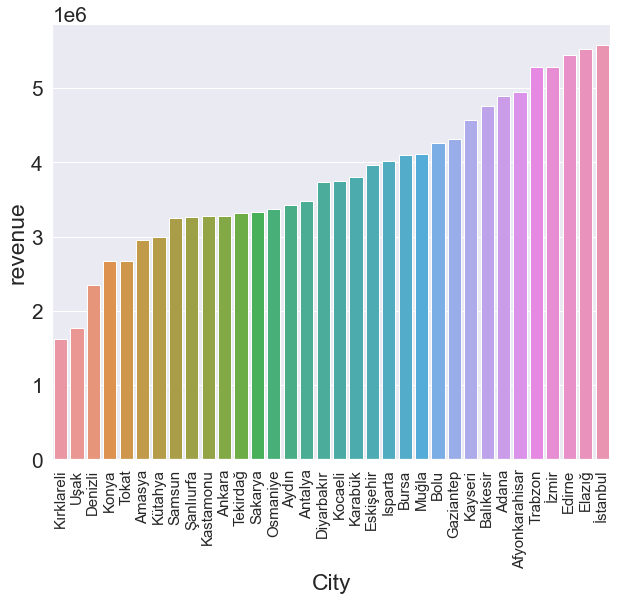

In [397]:
city_rev= train_data[['City','revenue']].groupby(['City'],as_index = False).mean()
asc_city_rev = city_rev.sort_values(['revenue'],ascending=True)
sns.barplot(x='City',y='revenue', data = asc_city_rev)
locs, labels = plt.xticks(rotation=90,fontsize=15)


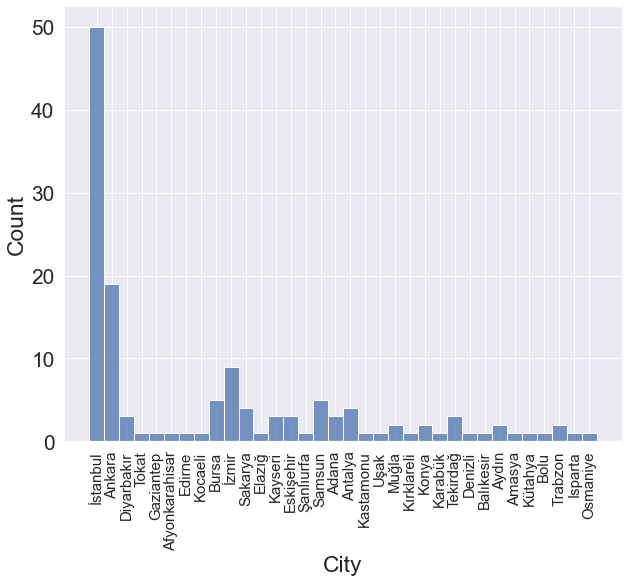

In [396]:
sns.histplot(train_data['City'])
locs, labels = plt.xticks(rotation=90,fontsize=15)

<AxesSubplot:xlabel='Type', ylabel='revenue'>

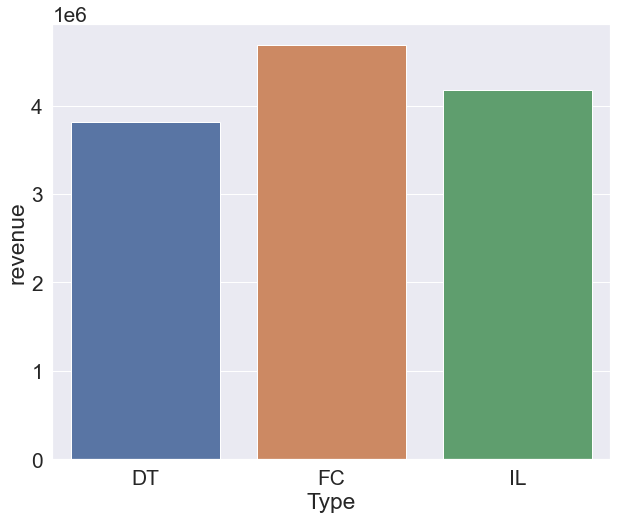

In [379]:
city_type_revenue = train_data[['Type','revenue']].groupby(['Type'],as_index=False).mean()
sns.barplot(x='Type',y='revenue',data=city_type_revenue)

<AxesSubplot:xlabel='City Group', ylabel='revenue'>

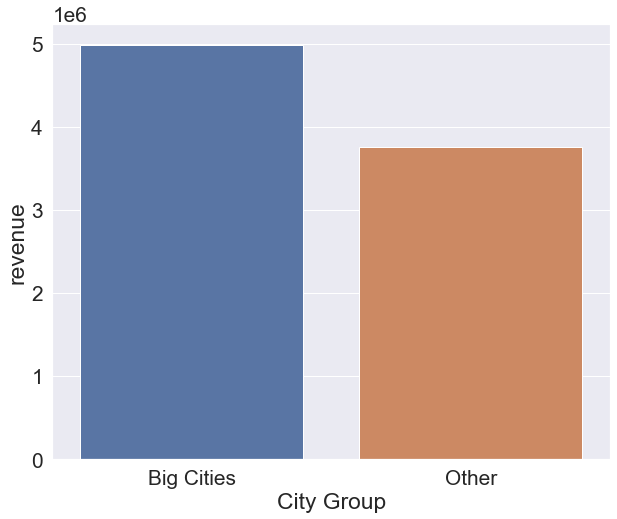

In [380]:
city_group_revenue = train_data[['City Group','revenue']].groupby(['City Group'],as_index=False).mean()
sns.barplot(x='City Group',y='revenue',data=city_group_revenue)

<AxesSubplot:xlabel='Type', ylabel='Open Days'>

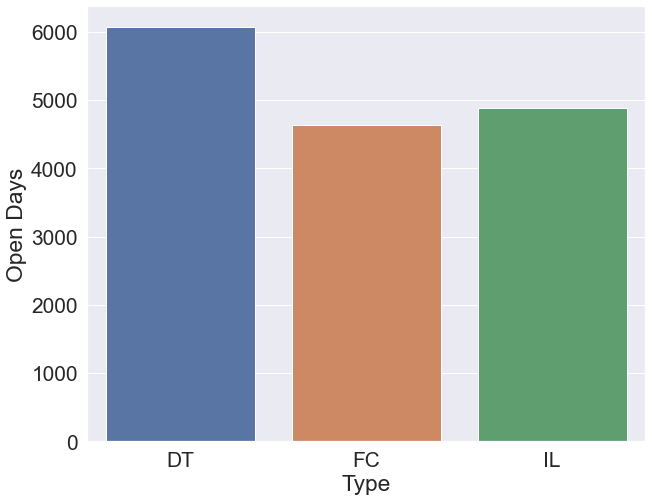

In [381]:
type_workingdays = train_data[['Type','Open Days']].groupby(['Type'],as_index=False).mean()
sns.barplot(x='Type',y='Open Days',data=type_workingdays)

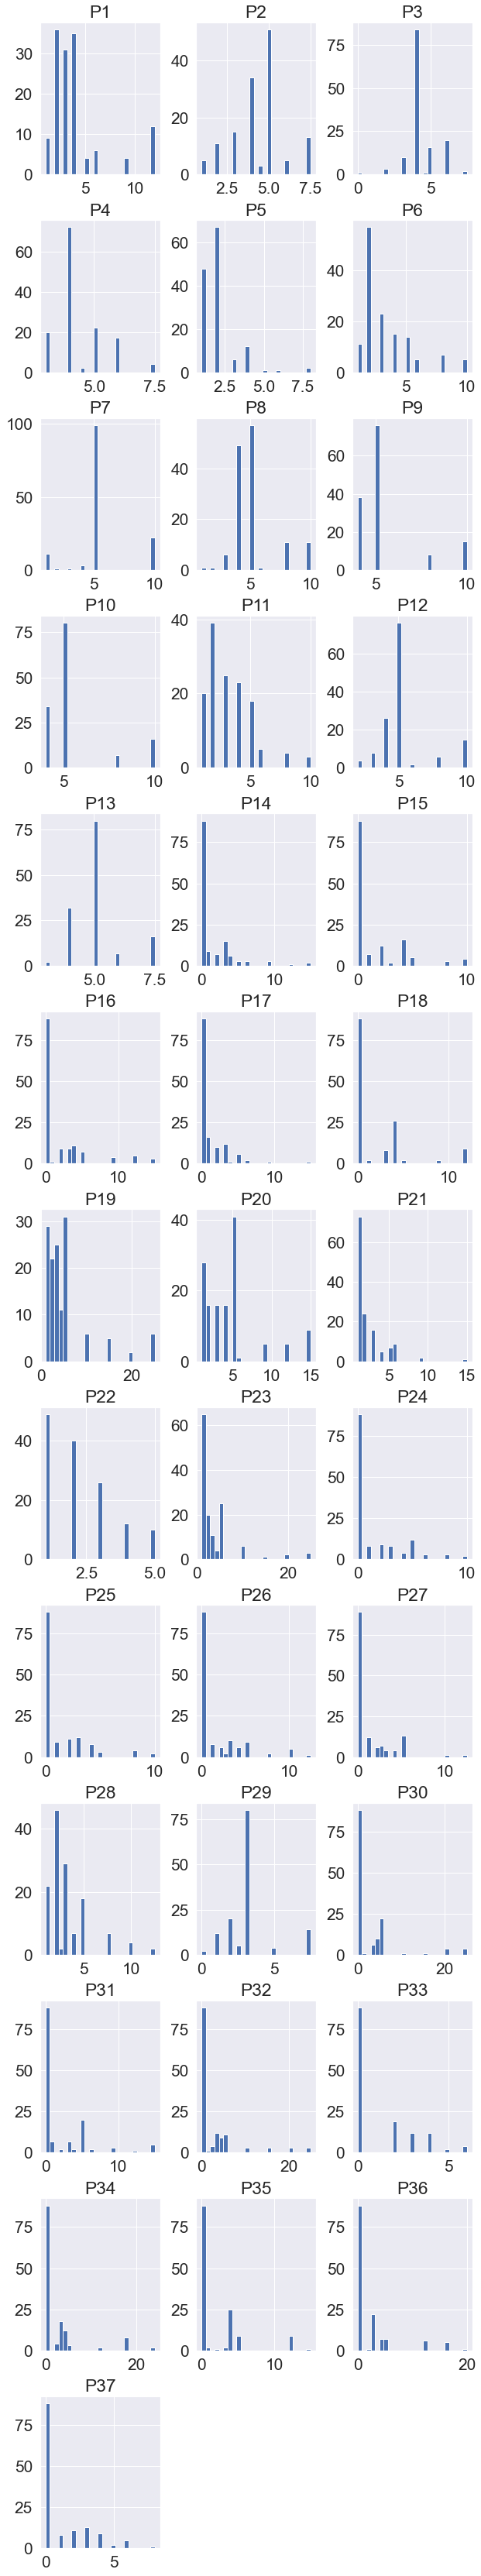

In [382]:
hist_cols = list(train_data.columns[4:42])
train_data[hist_cols].hist(figsize= (10,60), layout=(13,3), bins=25);

/Users/ikhatri/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(5000000, 2e-07, ' $g_1=$ 2.76')

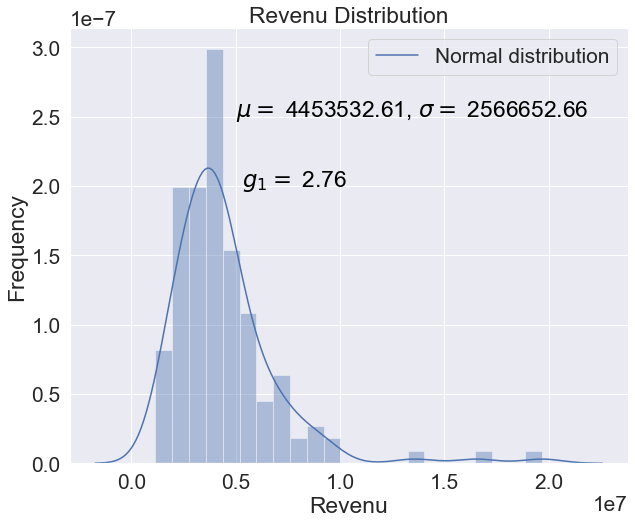

In [383]:
from scipy.stats import norm, skew
from scipy import stats
mu,sigma = norm.fit(train_data['revenue'])
skew = stats.skew(train_data['revenue'])
sns.distplot(train_data['revenue']).set_title("Revenu Distribution")
plt.legend([f'Normal distribution'], loc='best')
plt.xlabel("Revenu")
plt.ylabel("Frequency")
plt.text(5000000, 0.00000025,f'$\mu=$ {mu:.2f}, $\sigma=$ {sigma:.2f}' , color='black')
plt.text(5000000, 0.0000002,f' $g_{1}=$ {skew:.2f}' , color='black')

# The reveneu is rightly skewed

/Users/ikhatri/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(16, 0.7, ' $g_1=$ 0.30')

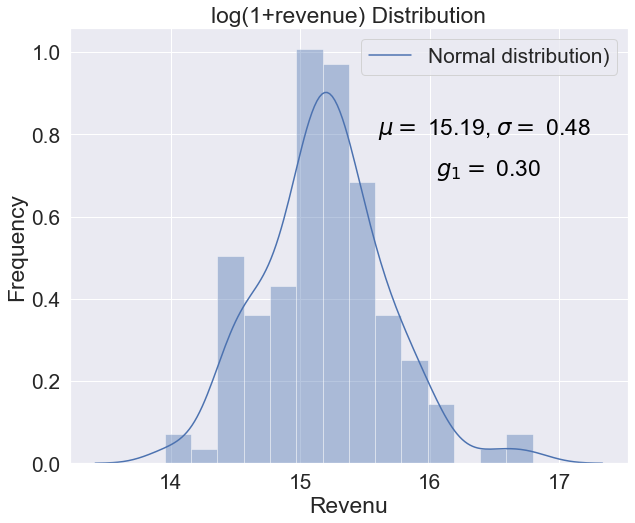

In [391]:
mu,sigma = norm.fit(np.log1p(train_data['revenue']))
skew = stats.skew(np.log1p(train_data['revenue']))
sns.distplot(np.log1p(train_data['revenue'])).set_title("log(1+revenue) Distribution")
plt.legend([f'Normal distribution)'], loc='best')
plt.xlabel("Revenu")
plt.ylabel("Frequency")
plt.text(15.6, 0.8,f'$\mu=$ {mu:.2f}, $\sigma=$ {sigma:.2f}' , color='black')
plt.text(16, 0.7,f' $g_{1}=$ {skew:.2f}' , color='black')

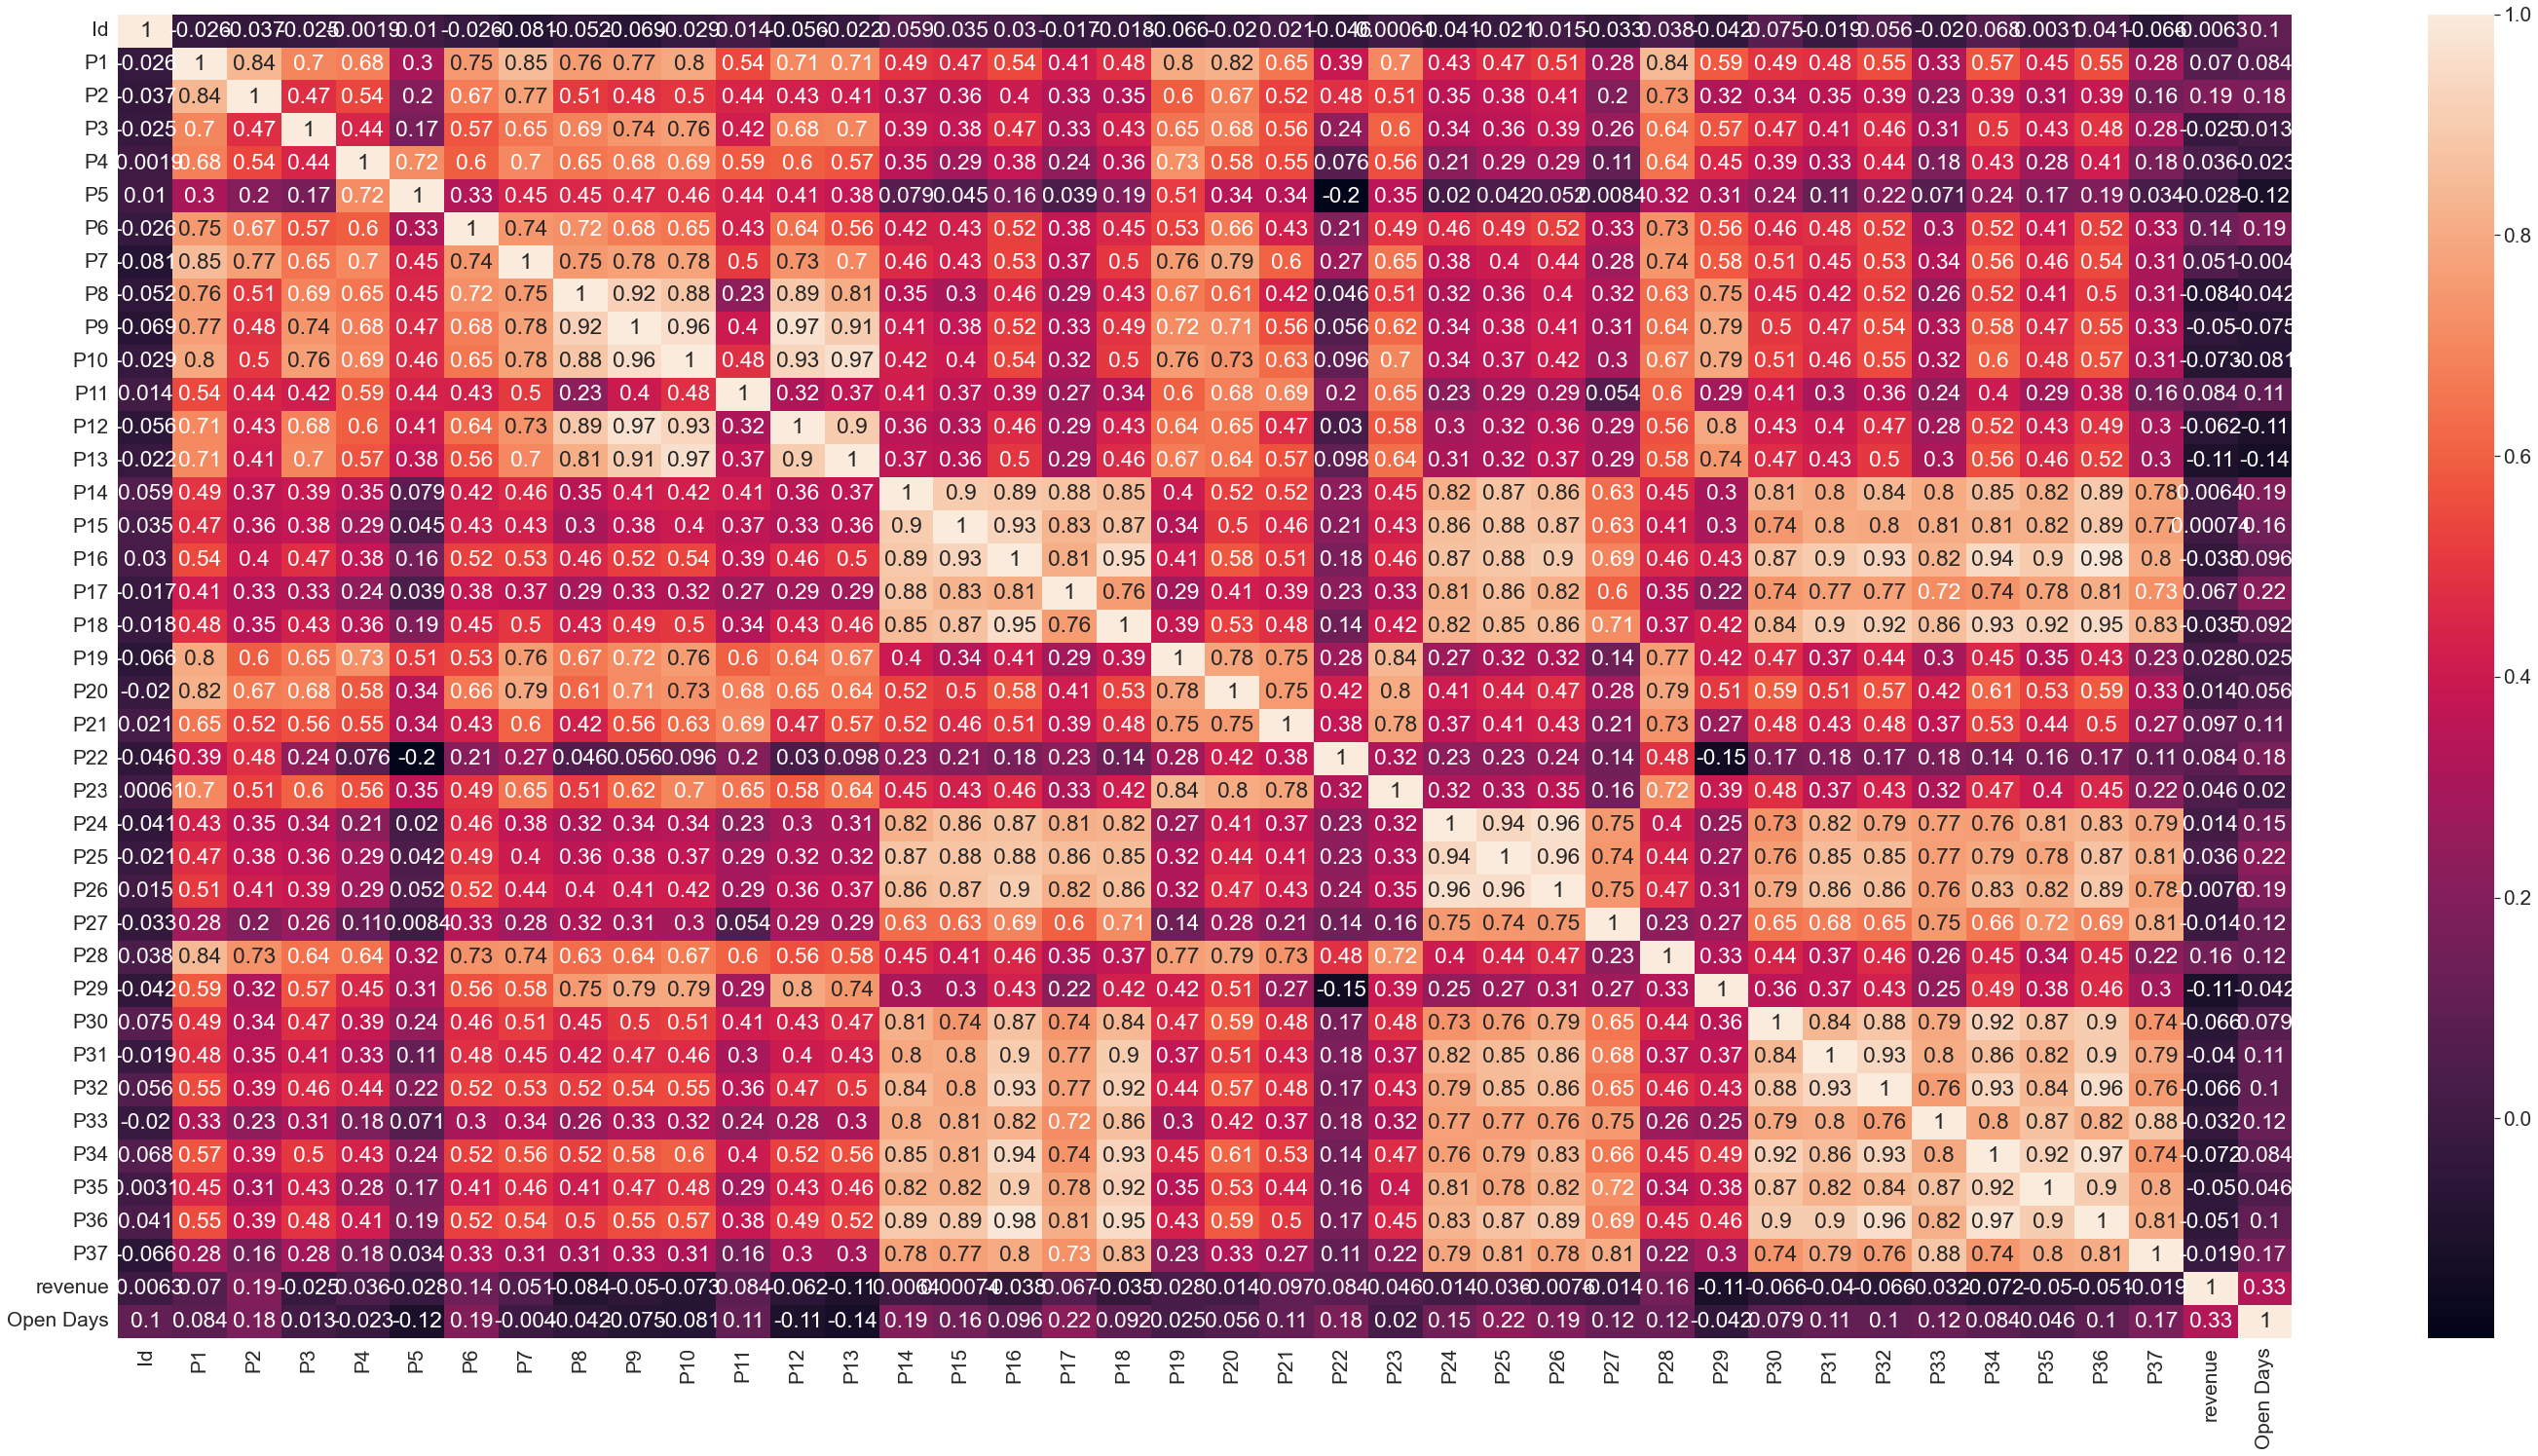

In [387]:
plt.figure(figsize=(50,25))
sns.heatmap(train_data.corr(),annot=True)
sns.set(font_scale=1.9)

##### No obvious relationship of individual numerical values with revenue

# Feature Engineering

In [408]:
# drop the certain features
train_data = train_data.drop('Id',axis=1)

In [409]:
train_data.head(2)

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0


In [410]:
train_data = train_data.drop('City',axis=1)
train_data = train_data.drop('City Group',axis=1)
train_data = train_data.drop('Type',axis=1)
train_data = train_data.drop('Open Date',axis=1)

In [411]:
train_data.head(2)

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,4,5.0,4.0,4.0,2,2,5,4,5,5,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,4,5.0,4.0,4.0,1,2,5,5,5,5,...,3.0,0,0,0,0,0,0,0,0,6923131.0


In [412]:
X=train_data.drop('revenue',axis=1)
y=train_data['revenue']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=30)

In [417]:
X_train.head(2)

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,4,5.0,4.0,4.0,2,2,5,4,5,5,...,2.0,3.0,5,3,4,5,5,4,3,4
24,5,5.0,3.0,5.0,2,2,5,5,5,4,...,3.0,2.0,5,5,4,4,4,4,5,2


# Performing the Multiple Linear regression

In [418]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [419]:
regressor.fit(X_train,y_train)

LinearRegression()

In [420]:
import pickle
filename = 'ResturantRevenueLinearRegression.csv'
pickle.dump(regressor,open(filename,'wb'))
#load model
regressor = pickle.load(open(filename,'rb'))

In [421]:
y_pred = regressor.predict(X_test)

In [422]:
y_pred[:3]

array([2398811.67033319, 5120294.2797706 , 7015598.56952382])

In [425]:
y_true,y_pred = np.array(y_test),np.array(y_pred)
print(np.mean(np.abs(y_true - y_pred)/y_true)*100)

48.074865649555704


### Error is 50 so the model is not good

In [428]:
regressor.coef_

array([  229451.63310244,   248538.51364025,  -122555.00817748,
        -234715.04269372,   187984.4840525 ,   479450.37254499,
         -23565.91030842, -1342385.70077142,  1786820.19073413,
        -205492.09447322,  -260249.74102135,  -381670.46672413,
        -835322.90951358,  -140377.11139738,   124574.25205196,
        -791605.19193442,   490920.70211183,   509162.37153634,
         -95956.69571697,  -362297.88596925,    79816.2464199 ,
        -157109.29775425,   141911.89745247,   708584.15542105,
          98087.18042404, -1174747.24206878,    47638.99066699,
         684772.28829903,  -141035.02277277,    -4968.8340601 ,
         168539.40374304,  -345516.35409745,  -200792.62207831,
         329436.02358392,  -301147.87436436,   391973.61931778,
         153402.31389837])

In [429]:
regressor.intercept_

7783045.034544229